# Feature engineering
This notebook uses the information about Polish Parliment deputies scraped in the previous notebook and cleans up a database.

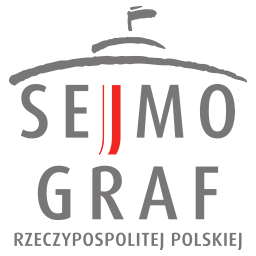


# Environment setup

## Google Drive mount
I'm using Google Colaboratory as my default platform, therefore I need to set up my environment to integrate it with Google Drive. You can skip this bit if you're working locally.

1. Mount Google Drive on the runtime to be able to read and write files. This will ask you to log in to your Google Account and provide an authorization code.
2. Create a symbolic link to a working directory 
3. Change the directory to the one where I cloned my repository.


In [1]:
# mount Google Drive on the runtime
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# create a symbolic link to a working directory
!ln -s /content/gdrive/My\ Drive/Colab\ Notebooks/SEJMograf /mydrive

# navigate to the working directory
%cd /mydrive

/content/gdrive/My Drive/Colab Notebooks/SEJMograf


## Libraries & functions
Let's now install missing libraries and import the necessary libraries and functions we're gonna use in this notebook.

- `requests` - http handling
- `BeautifulSoup` - html parsing & web-scraping
- `urllib.request` - url-opening
- `tqdm.notebook` - loop progress bar for notebooks
- `timeit` - cell runtime check
- `numpy` - linear algebra
- `pandas` - data manipulation & analysis
- `sys` - system-specific parameters & functions
- `os` - operating system interfaces
- `os.path` - pathname manipulation
- `json` - JSON files handling

In [9]:
import pandas as pd
import numpy as np
import nltk
from nltk import *
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import spacy

!pip install ner-d
from nerd import ner

# import requests
# import bs4
# from bs4 import BeautifulSoup
# import tqdm.notebook as tq
# import timeit


# import time
# import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
     |████████████████████████████████| 10.3MB 6.2MB/s 
     |████████████████████████████████| 2.2MB 46.9MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


# Load data

In [6]:
df = pd.read_pickle('df_deputies.pkl')
df.head()

,name,url,picture,election_date,election_list,election_constituency,election_votes,oath_date,service_history,party,birth_date,birth_place,education,schools,occupation,number_of_speeches,interpellations_pursued,interpellations_dismissed,inquiries_pursued,inquiries_dismissed,statements,current_questions,voting_frequency,committees,delegations,groups,offices,coworkers,asset_declarations,benefit_register,emails
0,Adamczyk Andrzej,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,13-10-2019,Prawo i Sprawiedliwość,Kraków,29686,12-11-2019,"poseł V kadencji, poseł VI kadencji, poseł VII...",Klub Parlamentarny Prawo i Sprawiedliwość,04-01-1959,Krzeszowice,wyższe,"Społeczna Akademia Nauk w Łodzi, Wydział Zarzą...",parlamentarzysta,"[6, https://www.sejm.gov.pl/wypowiedzi.xsp?id=...",[],[],[],[],[],[],98.46,[],[],[],"[[*Biuro Poselskie Posła Andrzeja Adamczyka, [...","[[Adam Bielecki, Asystent społeczny, https://o...","[[Początek kadencji, https://orka.sejm.gov.pl/...",[],Andrzej.Adamczyk@sejm.pl
1,Adamczyk Rafał,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,13-10-2019,Sojusz Lewicy Demokratycznej,Katowice,12148,12-11-2019,brak,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",30-05-1974,Dąbrowa Górnicza,wyższe,"Politechnika Śląska, Organizacja i Zarządzanie...",samorządowiec,"[18, https://www.sejm.gov.pl/wypowiedzi.xsp?id...","[Interpelacje, którym nadano bieg:, https://ww...",[],"[Zapytania, którym nadano bieg:, https://www.s...",[],[],"[Pytania w sprawach bieżących:, https://www.se...",99.57,"[[Komisja Administracji i Spraw Wewnętrznych,...","[[Polsko-Niderlandzka Grupa Parlamentarna, /SQ...","[[Parlamentarny Zespół Antysmogowy, agent.xsp?...",[[*Biuro Poselskie Posła na Sejm RP Rafała Ada...,"[[Michał Curyło, Asystent społeczny, https://o...","[[Początek kadencji, https://orka.sejm.gov.pl/...","[[2020-01-09, https://orka.sejm.gov.pl/rkor9.n...",Rafal.Adamczyk@sejm.pl
2,Adamowicz Piotr,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,13-10-2019,Koalicja Obywatelska,Gdańsk,41795,12-11-2019,brak,Klub Parlamentarny Koalicja Obywatelska - Plat...,26-06-1961,Elbląg,średnie ogólne,VI LO GdaÅ„sk (1980),dziennikarz,"[13, https://www.sejm.gov.pl/wypowiedzi.xsp?id...","[Interpelacje, którym nadano bieg:, https://ww...",[],"[Zapytania, którym nadano bieg:, https://www.s...",[],"[Oświadczenia:, https://www.sejm.gov.plinterpe...","[Pytania w sprawach bieżących:, https://www.se...",98.71,"[[Komisja Kultury i Środków Przekazu, agent.x...","[[Grupa Parlamentarna Polska-Republika Korei, ...","[[Parlamentarny Zespół ds. Białorusi, agent.xs...","[[*Biuro Posła na Sejm RP Piotra Adamowicza, [...","[[Zofia Lisicka, Asystent społeczny, https://o...","[[Początek kadencji, https://orka.sejm.gov.pl/...","[[2020-01-09, https://orka.sejm.gov.pl/rkor9.n...",Piotr.Adamowicz@sejm.pl
3,Ajchler Romuald,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,13-10-2019,Sojusz Lewicy Demokratycznej,Piła,14438,12-11-2019,"poseł II kadencji, poseł III kadencji, poseł I...","Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",19-01-1949,Duszniki Wielkopolskie,średnie zawodowe,"PaÅ„stwowe Technikum Rolnicze, Rolnictwo - tec...",rolnik,"[42, https://www.sejm.gov.pl/wypowiedzi.xsp?id...","[Interpelacje, którym nadano bieg:, https://ww...",[],"[Zapytania, którym nadano bieg:, https://www.s...",[],[],"[Pytania w sprawach bieżących:, https://www.se...",96.54,"[[Komisja Polityki Społecznej i Rodziny, agen...",[],"[[Wielkopolski Zespół Parlamentarny, agent.xsp...",[[*Biuro Poselskie Posła na Sejm Romualda Ajch...,"[[Lidia Nowakowska, Pracownik, https://orka.se...","[[Początek kadencji, https://orka.sejm.gov.pl/...","[[2020-01-09, https://orka.sejm.gov.pl/rkor9.n...",Romuald.Ajchler@sejm.pl
4,Andruszkiewicz Adam,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.p

## Name

https://spacy.io/models

https://www.nltk.org/api/nltk.html

http://nlp.pwr.wroc.pl/en/

http://plwordnet.pwr.wroc.pl/wordnet/

http://zil.ipipan.waw.pl/LemmaPL

http://morfeusz.sgjp.pl/

https://ichi.pro/pl/cos-z-niczego-uzyj-nlp-i-ml-do-wyodrebniania-i-strukturyzacji-danych-internetowych-69585767705363